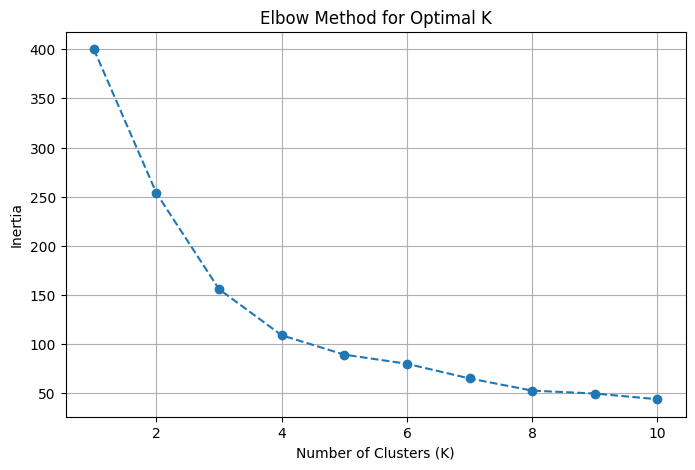

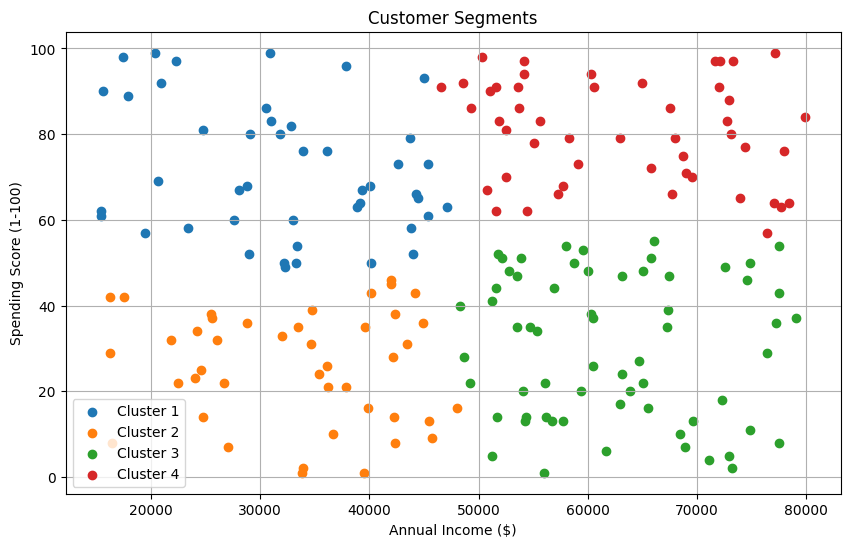

Cluster Centers (Normalized):
[[-0.99007755  0.73375143]
 [-0.91998357 -0.89348272]
 [ 0.72973512 -0.73542442]
 [ 0.77835654  1.05576899]]
Cluster 1 Center: Annual Income = $32179.24, Spending Score = 71.47
Cluster 2 Center: Annual Income = $33407.88, Spending Score = 25.77
Cluster 3 Center: Annual Income = $62324.90, Spending Score = 30.21
Cluster 4 Center: Annual Income = $63177.16, Spending Score = 80.51


In [1]:
# Import necessary libraries
import numpy as np  # For numerical operations
import pandas as pd  # For handling data in tabular format
import matplotlib.pyplot as plt  # For visualizing clusters
from sklearn.cluster import KMeans  # For applying K-Means clustering
from sklearn.preprocessing import StandardScaler  # For normalizing data

# Step 1: Create a synthetic dataset for customer segmentation
# Features: Annual Income (in $), Spending Score (1-100)
data = {
    "CustomerID": range(1, 201),  # 200 customers
    "AnnualIncome": np.random.randint(15000, 80000, 200),  # Random incomes
    "SpendingScore": np.random.randint(1, 101, 200),  # Random spending scores
}
df = pd.DataFrame(data)

# Step 2: Preprocess the data
# Drop CustomerID as it's not relevant for clustering
X = df.drop(columns=["CustomerID"])

# Normalize the features for better clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply K-Means Clustering
# Determine the optimal number of clusters using the Elbow Method
inertia = []
range_clusters = range(1, 11)
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)  # Inertia measures cluster compactness

# Plot the Elbow Curve to visualize the optimal number of clusters
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker="o", linestyle="--")
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# From the elbow curve, let's assume the optimal number of clusters is 4
optimal_k = 4

# Apply K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Step 4: Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster in range(optimal_k):
    cluster_data = df[df["Cluster"] == cluster]
    plt.scatter(
        cluster_data["AnnualIncome"],
        cluster_data["SpendingScore"],
        label=f"Cluster {cluster + 1}",
    )
plt.title("Customer Segments")
plt.xlabel("Annual Income ($)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.grid(True)
plt.show()

# Step 5: Analyze the results
# Display the cluster centers (in normalized scale)
print("Cluster Centers (Normalized):")
print(kmeans.cluster_centers_)

# Add denormalized cluster centers for interpretation
centers = scaler.inverse_transform(kmeans.cluster_centers_)
for i, center in enumerate(centers):
    print(f"Cluster {i + 1} Center: Annual Income = ${center[0]:.2f}, Spending Score = {center[1]:.2f}")

